<a href="https://colab.research.google.com/github/bipinKrishnan/fastai_course/blob/master/mid_level_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai --upgrade

In [65]:
from fastai.text.all import *
from inspect import signature, getfullargspec

## Decorators and function signature

In [96]:
def decorator_func(func): 
  lis = [isinstance(3, signature(func).parameters[i].annotation) for i in getfullargspec(func)[0]]

  return lis

In [100]:
def sample_func(x: int, y: str): return x

In [110]:
decorator_func(sample_func)

[True, False]

In [64]:
def ffff(x: int, y: str, u: float, q: bool): return x, y, u, q

In [74]:
for i in range(len(getfullargspec(ffff)[0])):
  param = getfullargspec(ffff)[0][i]
  
  print(param, signature(ffff).parameters[param].annotation)

  print(isinstance(2.0, signature(ffff).parameters[param].annotation))

x <class 'int'>
False
y <class 'str'>
False
u <class 'float'>
True
q <class 'bool'>
False


In [17]:
def f(x:int): return x+3
tfm = Transform(f)

tfm(2.0), tfm(4), tfm("qwe")

(2.0, 7, 'qwe')

In [18]:
@Transform
def f1(x: str): return x+" hello"

f1(2.0), f1(4), f1("qwe")

(2.0, 4, 'qwe hello')

In [25]:
decorator_func(2), decorator_func("qwe"), decorator_func(2.8)

(10, 'qwe', 2.8)

In [37]:
sig = signature(f)

sig.parameters['x'].annotation

int

In [70]:
def sig(func): return signature(func).parameters['x'].annotation

In [71]:
sig(f)

int

In [157]:
def returns(func): return print(func()+" + func @returns()")

In [159]:
@returns
def dec(): 
  return "func dec()"

func dec() + func @returns()


In [165]:
@Transform
def f(x: int): return x+2

In [166]:
f(3), f(2.0)

(5, 2.0)

## Siamese Pair

In [29]:
from fastai.vision.all import *
import torch

import re

In [3]:
path = untar_data(URLs.PETS)
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
files = get_image_files(path/'images')
files

(#7390) [Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_92.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/boxer_146.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_77.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/wheaten_terrier_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_123.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_187.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_93.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_16.jpg')...]

In [114]:
class SiameseImage(fastuple):
  def show(self, ctx=None, **kwargs):
    img1, img2, same_breed = self

    if not isinstance(img1, Tensor):
      if img2.size != img1.size: img2.resize(img1.size)
      t1, t2 = tensor(img1), tensor(img2)
      t1, t2 = t1.permute(2, 1, 0), t2.permute(2, 1, 0)
    else: t1, t2 = img1, img2

    line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)

    return show_image(torch.cat([t1, line, t2], dim=2), title=same_breed, ctx=ctx)

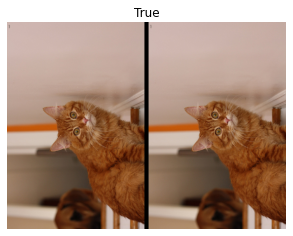

In [115]:
img = PILImage.create(files[0])
s = SiameseImage(img, img, True)

s.show();

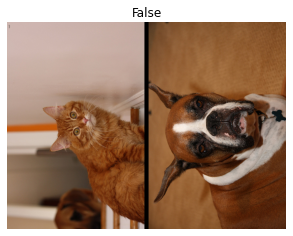

In [116]:
img1 = PILImage.create(files[1])
s1 = SiameseImage(img, img1, False)

s1.show();

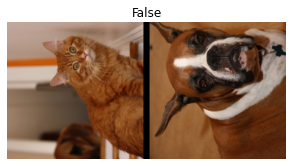

In [117]:
s2 = Resize(224)(s1)
s2.show()

In [39]:
[re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0] for fname in files[:5]]

['Maine_Coon', 'boxer', 'Siamese', 'wheaten_terrier', 'samoyed']

In [40]:
def label_func(fname): return re.match(r'^(.*)_\d+.jpg$', fname.name).groups()[0]

In [41]:
label_func(files[0])

'Maine_Coon'

In [42]:
files[:4].map(label_func)

(#4) ['Maine_Coon','boxer','Siamese','wheaten_terrier']

In [54]:
files.map(label_func).unique()

(#37) ['Maine_Coon','boxer','Siamese','wheaten_terrier','samoyed','havanese','chihuahua','basset_hound','Persian','Egyptian_Mau'...]

In [66]:
dic = {l: L(f for f in files if label_func(f)==l) for l in files.map(label_func).unique()}
dic

{'Abyssinian': (#200) [Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_97.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_112.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_140.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_169.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_180.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_21.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_14.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_62.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_107.jpg')...],
 'Bengal': (#200) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_15.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_196.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bengal_172.jpg'),Path('/roo

In [67]:
splits = RandomSplitter()(files)
splits

((#5912) [4296,6719,5068,4116,307,5896,3396,4384,4087,6262...],
 (#1478) [6308,2734,5318,2271,3336,5392,4078,2410,5502,798...])

In [85]:
# L(f for f in files[splits[0]])

def draw(f):
  same = random.random() < 0.5
  cls = label_func(f)

  if not same:
    print(cls)
    cls = random.choice(L(l for l in files.map(label_func).unique() if l != cls))

  return random.choice(dic[cls]),same 

draw(files[0])

Maine_Coon


(Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_16.jpg'), False)

In [89]:
random.choice(dic['Maine_Coon'])

Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_213.jpg')

In [106]:
class SiameseTransform(Transform):
  def __init__(self, files, label_func, splits):
    self.labels = files.map(label_func)
    self.lbl2files = {l: L(f for f in files if label_func(f)==l) for l in self.labels}
    self.label_func = label_func
    self.valid = {f: self._draw(f) for f in files[splits[1]]}

  def encodes(self, f):
    f2, t = self.valid.get(f, self._draw(f))
    img1, img2 = PILImage.create(f), PILImage.create(f2)

    return SiameseImage(img1, img2, t)

  def _draw(self, f):
    same = random.random() < 0.5
    cls = self.label_func(f)

    if not same:
      cls = random.choice(L(l for l in self.labels if self.labels != cls))  

    return random.choice(self.lbl2files[cls]), same


In [118]:
tfm = SiameseTransform(files, label_func, splits)

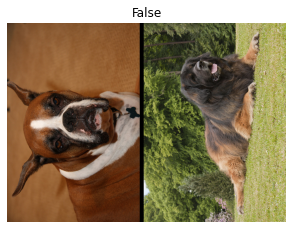

In [122]:
tfm(files[1]).show()

In [120]:
tls = TfmdLists(files, tfm, splits=splits)

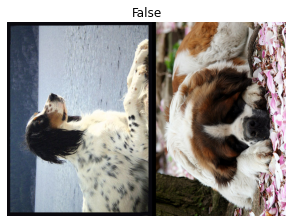

In [125]:
show_at(tls.valid, 1)

In [126]:
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],
                      after_batch=[IntToFloatTensor, Normalize.from_stats(*imagenet_stats)])

In [134]:
x1, x2, y = dls.one_batch()

x1.shape, x2.shape, y.shape

(torch.Size([64, 3, 224, 224]),
 torch.Size([64, 3, 224, 224]),
 torch.Size([64]))